In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/jewellery.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
scaled_df = pd.DataFrame(scaled_data,columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

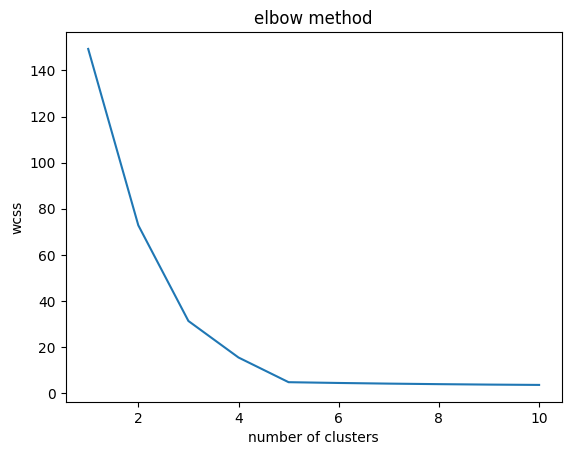

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(range(1,11),wcss,curve='convex',direction = 'decreasing')
kl.elbow

3

In [ ]:
kmeans = KMeans(n_clusters = 3,init='k-means++')
clusters = kmeans.fit_predict(scaled_df)
df['clusters'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


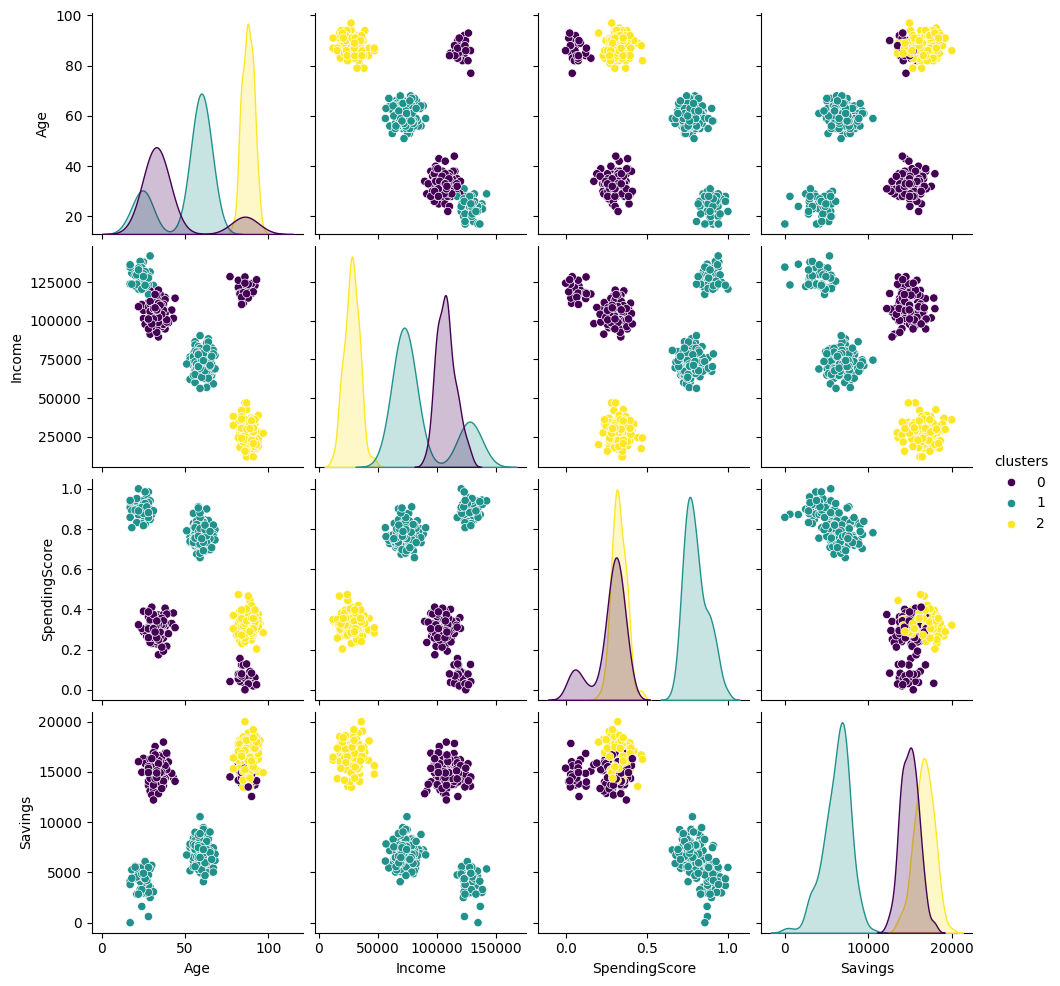

Cluster centroids:
         Age         Income  SpendingScore       Savings
0  41.589404  107695.980132       0.269935  14937.265769
1  51.314010   85873.439614       0.801802   6213.051446
2  87.775510   27866.102041       0.328800  16659.261445


In [ ]:
import seaborn as sns

sns.pairplot(df, hue='clusters', palette='viridis')
plt.show()

cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(cluster_centroids, columns=df.columns[:-1])
print("Cluster centroids:")
print(centroids_df)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(scaled_df)
  score = silhouette_score(scaled_df,kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
silhouette_coefficients

[0.5351410839500907,
 0.6823512495574657,
 0.756936496483927,
 0.8156911152768874,
 0.6354059853484542,
 0.44214211036238577,
 0.2841137372448278,
 0.2841740640894567,
 0.2801908843691638]

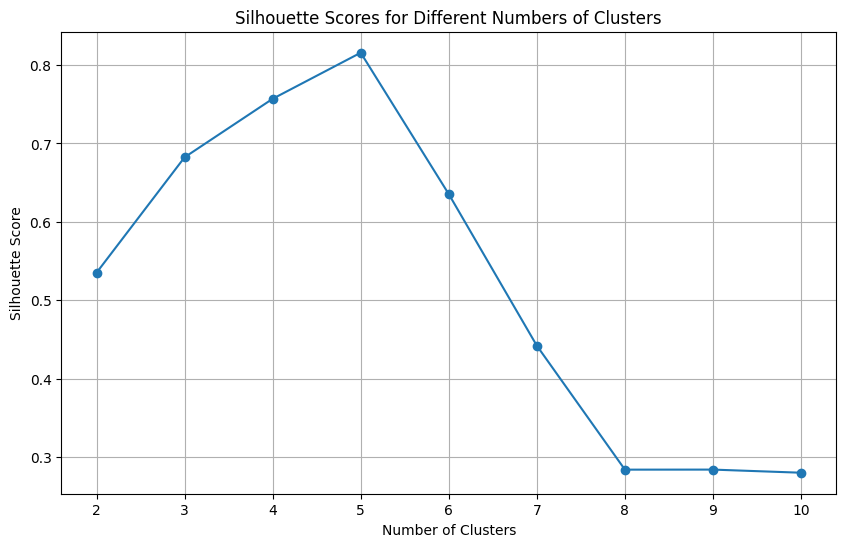

In [ ]:
clusters_range = range(2, 11)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range, silhouette_coefficients, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(clusters_range)
plt.grid(True)
plt.show()